In [1]:
import os
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import imageio
import cv2

In [2]:
dir(os)

['CLD_CONTINUED',
 'CLD_DUMPED',
 'CLD_EXITED',
 'CLD_TRAPPED',
 'DirEntry',
 'EX_CANTCREAT',
 'EX_CONFIG',
 'EX_DATAERR',
 'EX_IOERR',
 'EX_NOHOST',
 'EX_NOINPUT',
 'EX_NOPERM',
 'EX_NOUSER',
 'EX_OK',
 'EX_OSERR',
 'EX_OSFILE',
 'EX_PROTOCOL',
 'EX_SOFTWARE',
 'EX_TEMPFAIL',
 'EX_UNAVAILABLE',
 'EX_USAGE',
 'F_LOCK',
 'F_OK',
 'F_TEST',
 'F_TLOCK',
 'F_ULOCK',
 'MutableMapping',
 'NGROUPS_MAX',
 'O_ACCMODE',
 'O_APPEND',
 'O_ASYNC',
 'O_CLOEXEC',
 'O_CREAT',
 'O_DIRECTORY',
 'O_DSYNC',
 'O_EXCL',
 'O_EXLOCK',
 'O_NDELAY',
 'O_NOCTTY',
 'O_NOFOLLOW',
 'O_NONBLOCK',
 'O_RDONLY',
 'O_RDWR',
 'O_SHLOCK',
 'O_SYNC',
 'O_TRUNC',
 'O_WRONLY',
 'PRIO_PGRP',
 'PRIO_PROCESS',
 'PRIO_USER',
 'P_ALL',
 'P_NOWAIT',
 'P_NOWAITO',
 'P_PGID',
 'P_PID',
 'P_WAIT',
 'PathLike',
 'RTLD_GLOBAL',
 'RTLD_LAZY',
 'RTLD_LOCAL',
 'RTLD_NODELETE',
 'RTLD_NOLOAD',
 'RTLD_NOW',
 'R_OK',
 'SCHED_FIFO',
 'SCHED_OTHER',
 'SCHED_RR',
 'SEEK_CUR',
 'SEEK_END',
 'SEEK_SET',
 'ST_NOSUID',
 'ST_RDONLY',
 'TMP_MAX',
 'W

In [3]:
os.getcwd()


'/Users/stevenhansen/GitHub/radon_monitor'

## Table of Contents <a name = 'toc'></a>
1. [Browse Files](#browsefiles)

In [21]:
import datetime as dt
help(dt.datetime.fromtimestamp)

Help on built-in function fromtimestamp:

fromtimestamp(...) method of builtins.type instance
    timestamp[, tz] -> tz's local time from POSIX timestamp.



In [25]:
import time
dt.datetime.fromtimestamp(list(os.scandir(fp))[0].stat().st_ctime).strftime('%m-%b-%Y %H:%M')

'11-Nov-2021 22:55'

In [4]:
fp = '/Volumes/wellington/projects/radon_monitor/data/hourly_tests/'
photo_files = [i.name for i in os.scandir(fp)]
photo_path = [fp+i for i in photo_files]
print('Number of files found = {}'.format(len(photo_path)))

Number of files found = 167


In [18]:
new_postition = '/Volumes/wellington/projects/radon_monitor/data/hourly_tests/tests_12-12-2021_1346.png'

In [16]:
photo_path[-1]

'/Volumes/wellington/projects/radon_monitor/data/hourly_tests/tests_12-12-2021_1346.png'

## Browse files

In [14]:
def browse_files(i,return_data=False):
    photo_data = imageio.imread(photo_path[i])
    plt.figure(figsize=(15,15))
    plt.imshow(photo_data)
    if return_data:return photo_data

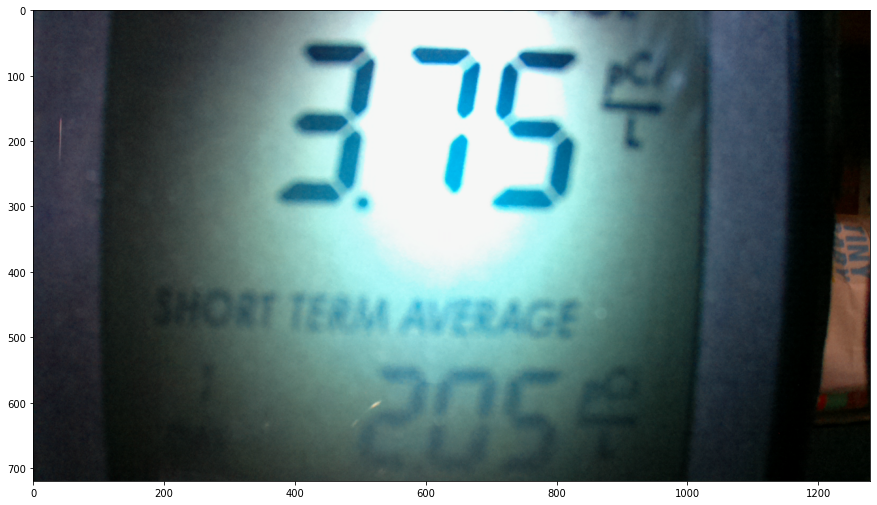

In [15]:
browse_files(-1)

## Low value filter

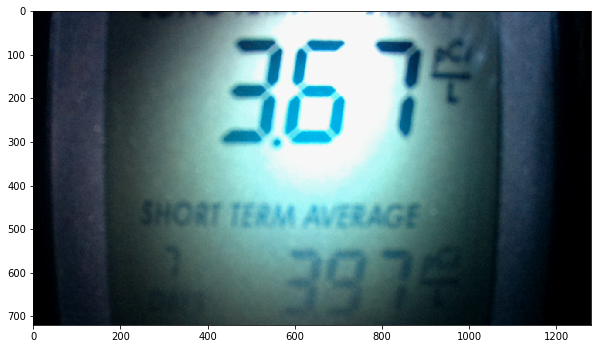

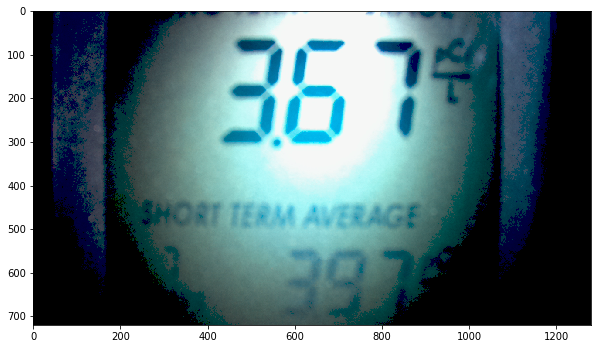

In [9]:
# low value filter
photo_data = imageio.imread(photo_path[2])
low_value_filter = photo_data < 50
plt.figure(figsize=(10,10))
plt.imshow(photo_data)
photo_data[low_value_filter] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)

## Position Scraper

In [7]:
def scope(position,fp,return_data = False,show = True):
    photo_data = imageio.imread(fp)
    photo_data[position['trow']:position['brow'], position['lcol']:position['rcol'],1]=100
    if show:
        plt.figure(figsize=(10,10))
        plt.imshow(photo_data)
    if return_data: return photo_data
def cutout(position,fp,return_data = False,show=True):
    photo_data = imageio.imread(fp)
    photo_data = photo_data[position['trow']:position['brow'], position['lcol']:position['rcol']]
    if show:
        plt.figure(figsize=(10,10))
        plt.imshow(photo_data)
    if return_data: return photo_data

### Top Row Positions

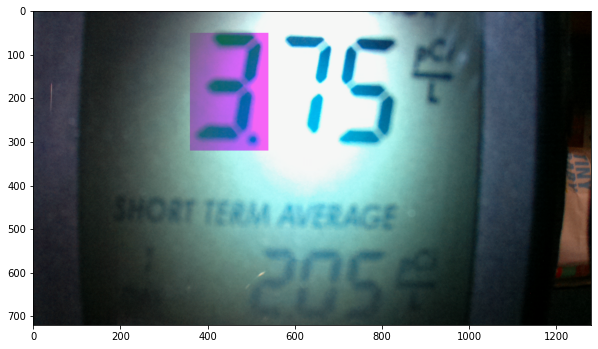

In [19]:
long_term0 = {'trow':50,'brow':320,'lcol':360,'rcol':540}
long_term1 = {'trow':50,'brow':320,'lcol':530,'rcol':710}
long_term2 = {'trow':50,'brow':320,'lcol':700,'rcol':880}
scope(long_term0,new_postition)

### short term days position

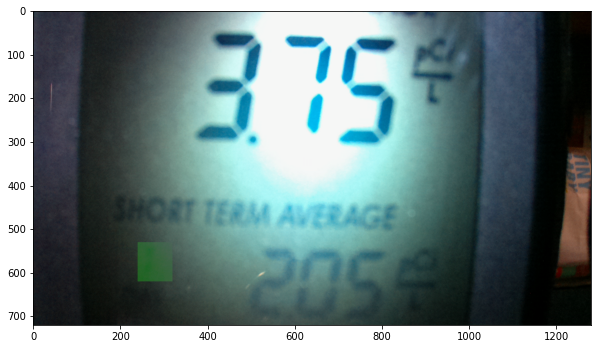

In [20]:
short_term = {'trow':530,'brow':620,'lcol':240,'rcol':320}
scope(short_term,new_postition)

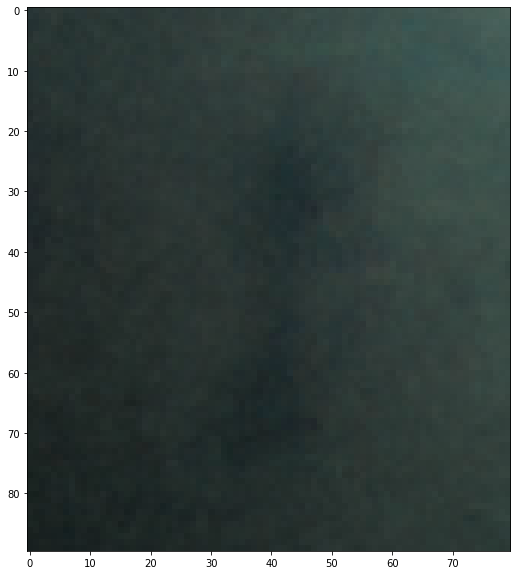

In [69]:
day_avg = cutout(short_term,new_postition,return_data = True)

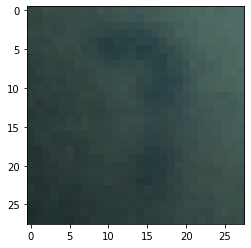

In [35]:
day_avg = cv2.resize(day_avg,(28,28))
plt.imshow(day_avg)

In [41]:
def low_value_mask(position,fp,cutoff = 70,return_data = False):
    photo_data = cutout(position,fp,return_data=True,show=False)
    photo_data = cv2.resize(photo_data,(28,28))
    mask   = photo_data[:, :,1] > cutoff
    photo_data[mask] = 100
    mask   = photo_data[:, :,1] > cutoff+30
    photo_data[mask] = 255
    
    plt.figure(figsize=(15,15))
    plt.imshow(photo_data)
    if return_data: return photo_data

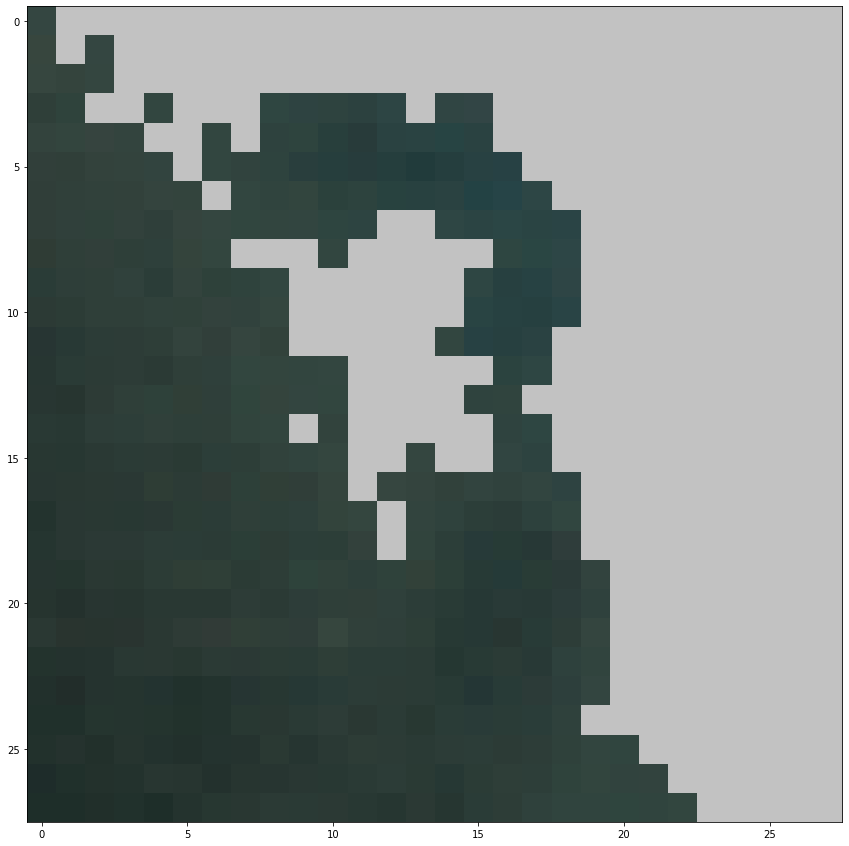

In [48]:
low_value_mask(short_term,photo_path[7])

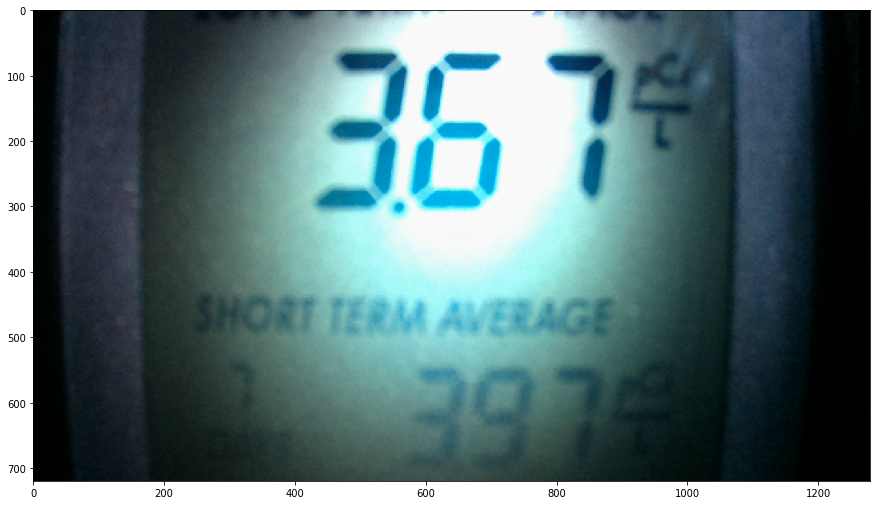

In [49]:
browse_files(7)

### short term rate

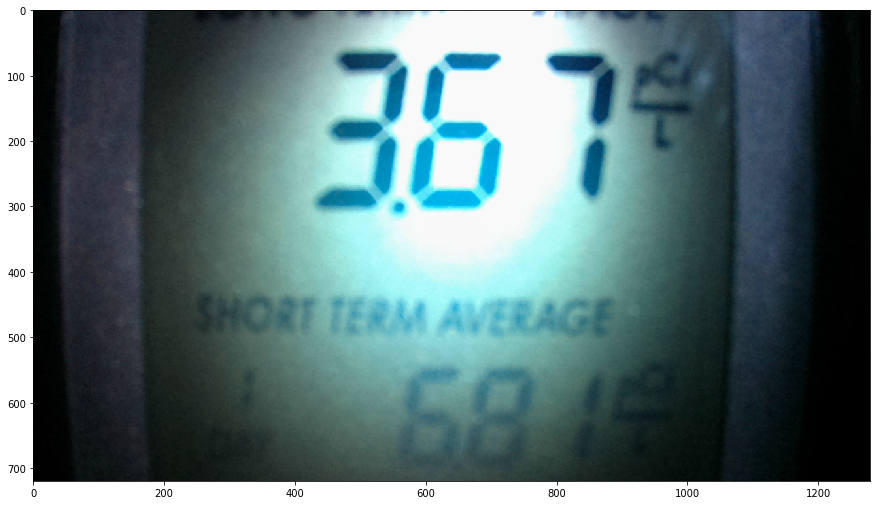

In [311]:
browse_files(4)

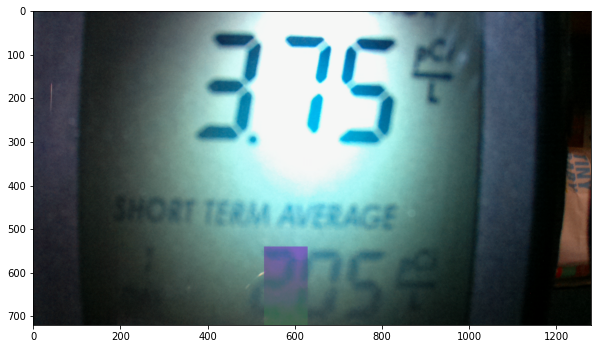

In [21]:
short_term_0 = {'trow':540,'brow':790,'lcol':530,'rcol':630}
short_term_1 = {'trow':540,'brow':790,'lcol':630,'rcol':730}
short_term_2 = {'trow':540,'brow':790,'lcol':730,'rcol':830}
scope(short_term_0,'/Volumes/wellington/projects/radon_monitor/data/hourly_tests/tests_12-12-2021_1346.png')

(180, 100, 4)

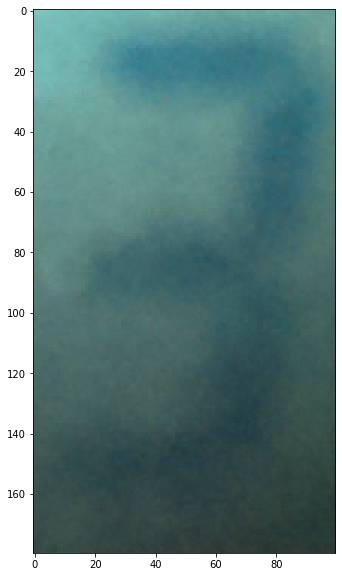

In [28]:
photo_data = cutout(short_term_1,photo_path[4],return_data = True)
photo_data.shape

In [29]:
img = cv2.resize(photo_data, (28, 28))

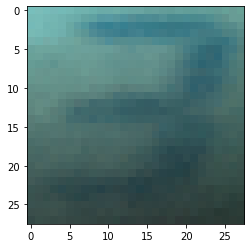

In [31]:
plt.imshow(img)

In [71]:
imageio.imwrite('test.png',photo_data)

In [68]:
photo_data

AttributeError: 'Array' object has no attribute 'save'

In [66]:
help(photo_data.tofile)

Help on built-in function tofile:

tofile(...) method of imageio.core.util.Array instance
    a.tofile(fid, sep="", format="%s")
    
    Write array to a file as text or binary (default).
    
    Data is always written in 'C' order, independent of the order of `a`.
    The data produced by this method can be recovered using the function
    fromfile().
    
    Parameters
    ----------
    fid : file or str or Path
        An open file object, or a string containing a filename.
    
        .. versionchanged:: 1.17.0
            `pathlib.Path` objects are now accepted.
    
    sep : str
        Separator between array items for text output.
        If "" (empty), a binary file is written, equivalent to
        ``file.write(a.tobytes())``.
    format : str
        Format string for text file output.
        Each entry in the array is formatted to text by first converting
        it to the closest Python type, and then using "format" % item.
    
    Notes
    -----
    This is a con